# 1. Import tensorflow and dataset:

In [1]:
import tensorflow as tf

In [2]:
import zipfile
location = 'pneumonia.zip'
zip_ref = zipfile.ZipFile(location, 'r')
zip_ref.extractall()
zip_ref.close()

# 2. Explore the dataset:

**1. Total classes and class names in the directory are:**

In [3]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pneumonia/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [4]:
print("Total classes in the dataset: ", len(class_names))

Total classes in the dataset:  2


In [5]:
print("Class names are: ", class_names)

Class names are:  ['normal' 'pneumonia']


**2. Number of images in each directory:**

**I. Train directory**

In [6]:
import os
num_train_normal = len(os.listdir('pneumonia/train/normal'))
num_train_pneumonia = len(os.listdir('pneumonia/train/pneumonia'))

In [7]:
print("Number of X-Ray images of pneumonia: ", num_train_pneumonia)
print("Number of X-Ray images of nomral: ", num_train_normal)
print("Total number of images in the train directory: ", num_train_pneumonia+num_train_normal)

Number of X-Ray images of pneumonia:  3875
Number of X-Ray images of nomral:  1431
Total number of images in the train directory:  5306


**II. Test directory:**

In [8]:
num_test_normal = len(os.listdir('pneumonia/test/normal'))
num_test_pneumonia = len(os.listdir('pneumonia/test/pneumonia'))

In [9]:
print("Number of X-Ray images of pneumonia: ", num_test_pneumonia)
print("Number of X-Ray images of nomral: ", num_test_normal)
print("Total number of images in the test directory: ", num_test_pneumonia+num_test_normal)

Number of X-Ray images of pneumonia:  390
Number of X-Ray images of nomral:  234
Total number of images in the test directory:  624


**3. Visualization of stats of train and test directory:**

**1. Training Images:**

In [10]:
import matplotlib.pyplot as plt

In [11]:
x = ['normal', 'pneumonia']
y1 = [num_train_normal, num_train_pneumonia]

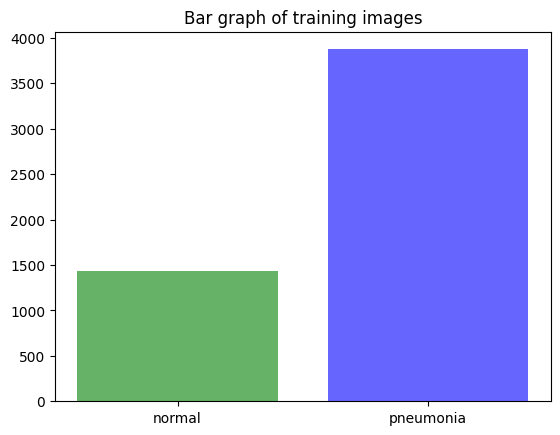

In [13]:
plt.title("Bar graph of training images")
plt.bar(x, y1, color=['g', 'b'], alpha=0.6)
plt.show()

**2. Validation images:**

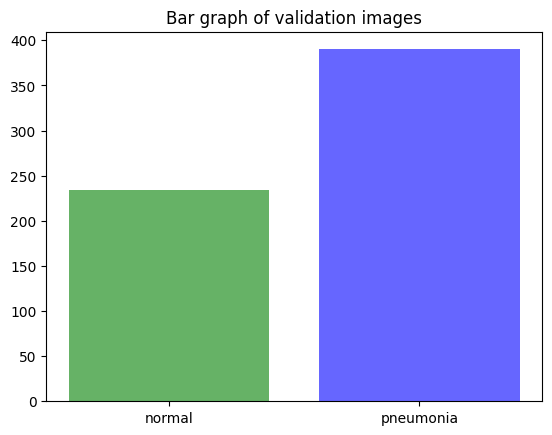

In [14]:
y2 = [num_test_normal, num_test_pneumonia]
plt.title("Bar graph of validation images")
plt.bar(x, y2, color=['g', 'b'], alpha=0.6)
plt.show()

# 3. Visualization of random images from the directory:

In [15]:
import random
import matplotlib.image as mpimg

In [16]:
train_dir = 'pneumonia/train'

def display_img(target_dir, target_class):
    target_folder = target_dir + '/' + target_class
    random_img = random.sample(os.listdir(target_folder), 1)
    print("Random Image: ", random_img)
    img = mpimg.imread(target_folder + '/' + random_img[0])
    print("Shape of image is: ", img.shape)
    plt.title(target_class)
    plt.imshow(img)
    return img

Random Image:  ['person16_bacteria_54.jpeg']
Shape of image is:  (924, 1460)


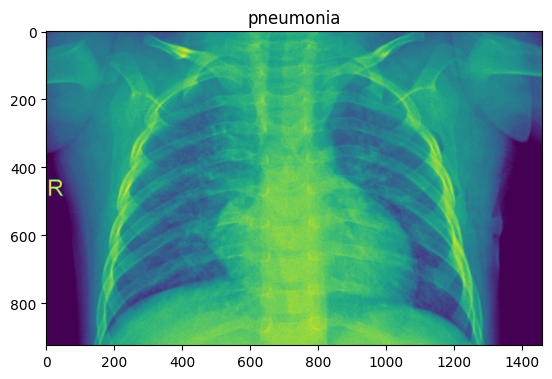

In [17]:
img1 = display_img(target_dir=train_dir, target_class=random.choice(class_names))

Random Image:  ['NORMAL2-IM-1321-0001.jpeg']
Shape of image is:  (1399, 1530)


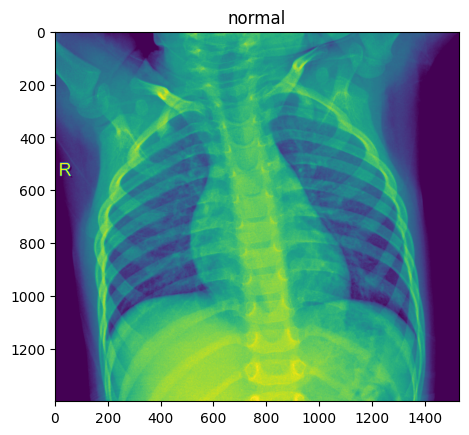

In [19]:
img2 = display_img(target_dir=train_dir, target_class=random.choice(class_names))

In [20]:
tf.constant(img1)

<tf.Tensor: shape=(924, 1460), dtype=uint8, numpy=
array([[53, 51, 50, ..., 32, 32, 32],
       [53, 52, 51, ..., 35, 35, 35],
       [54, 53, 53, ..., 38, 38, 38],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)>

# 4. Preprocessing Images:

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_dir = 'pneumonia/train'
test_dir = 'pneumonia/test'

In [23]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              color_mode='grayscale',
                                              class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            color_mode='grayscale',
                                            class_mode='binary')

Found 5306 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# 5. Build and compile the CNN model:

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [28]:
history = model.fit(train_data,
                   epochs=10,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data))

Epoch 1/10
166/166 [==============================] - 59s 299ms/step - loss: 0.3819 - accuracy: 0.8247 - val_loss: 0.4875 - val_accuracy: 0.7692
Epoch 2/10
166/166 [==============================] - 45s 272ms/step - loss: 0.2770 - accuracy: 0.8786 - val_loss: 0.3779 - val_accuracy: 0.8205
Epoch 3/10
166/166 [==============================] - 45s 272ms/step - loss: 0.2460 - accuracy: 0.8954 - val_loss: 0.2971 - val_accuracy: 0.8766
Epoch 4/10
166/166 [==============================] - 45s 269ms/step - loss: 0.2396 - accuracy: 0.8945 - val_loss: 0.3178 - val_accuracy: 0.8782
Epoch 5/10
166/166 [==============================] - 42s 251ms/step - loss: 0.2159 - accuracy: 0.9067 - val_loss: 0.6285 - val_accuracy: 0.7788
Epoch 6/10
166/166 [==============================] - 43s 256ms/step - loss: 0.2081 - accuracy: 0.9110 - val_loss: 0.3431 - val_accuracy: 0.8766
Epoch 7/10
166/166 [==============================] - 42s 255ms/step - loss: 0.1853 - accuracy: 0.9256 - val_loss: 0.3219 - val_ac

# 6. Visualization of accuracy and loss curve:

**1. Accuracy Curve:**

In [29]:
def plot_accuracy_curve(history):
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['accuracy']))

  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

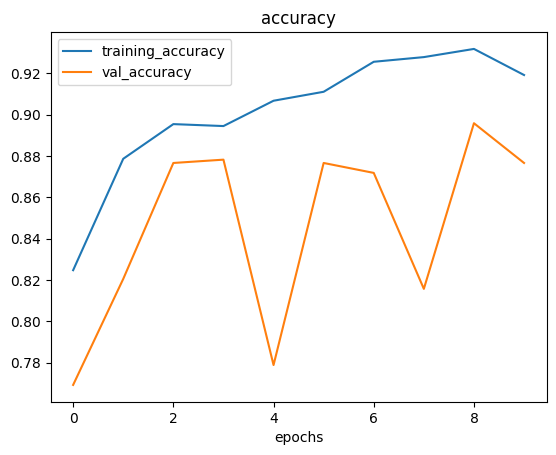

In [30]:
plot_accuracy_curve(history)

**2. Loss curve:**

In [31]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

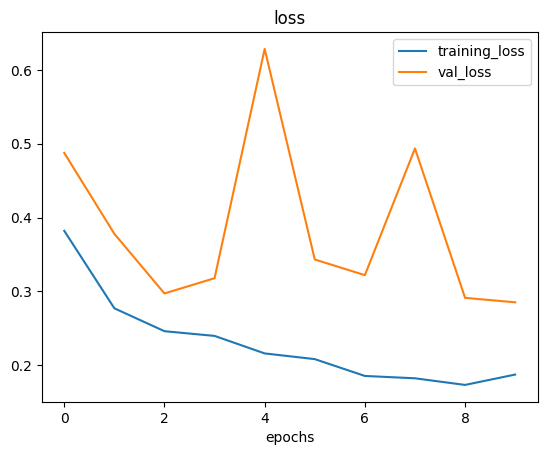

In [32]:
plot_loss_curve(history)

# 7. Checking our model performance on custom images:

In [33]:
def preprocess_img(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=([img_shape, img_shape]))
    img = img/255.
    return img

In [34]:
def pred_plot(model, filename, class_names=class_names):
    img = preprocess_img(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    print("Prediction value: ", pred)
    pred_class = class_names[int(tf.round(pred))]
    if pred_class=='normal':
        plt.title('Prediction: Normal Lungs')
    else:
        plt.title("Prediction: Pneumonia Infected Lungs")
    plt.imshow(img)
    plt.axis(False)

1/1 [==============================] - 0s 441ms/step
Prediction value:  [[0.05418075]]


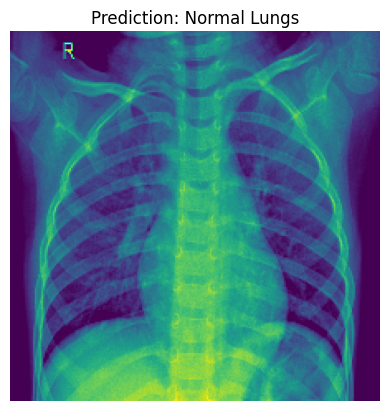

In [35]:
pred_plot(model, 'n1.jpeg')

1/1 [==============================] - 0s 30ms/step
Prediction value:  [[0.9377339]]


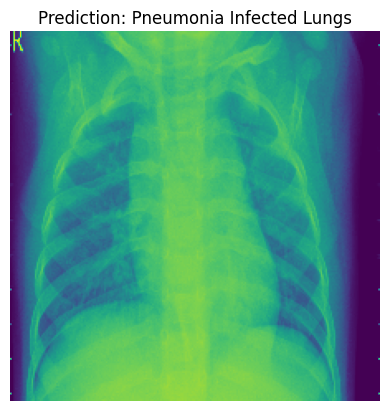

In [36]:
pred_plot(model, 'p1.jpeg')

1/1 [==============================] - 0s 26ms/step
Prediction value:  [[0.8625937]]


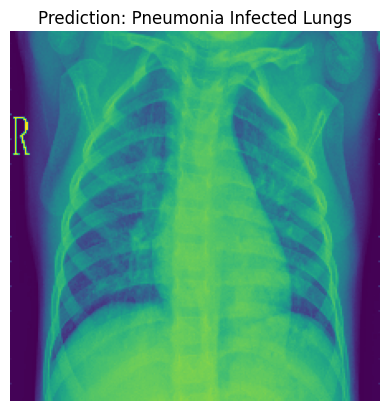

In [37]:
pred_plot(model, 'p2.jpeg')